In [5]:
#for Reproducibility Purposes we set a seed
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.compat.v1.set_random_seed(1)

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
#tf.keras.utils.to_categorical

In [12]:
#Just Loading the data from mnist
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

#We reshape the data just as we did before, Images aare 28x28 pixels and have 1 color channel (Grey_Scale)
#Y_train and Y_test are the labels ,  they have 10 classes
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

#This are the lalbels 0,10 . The number 4 will be depicted as 4 is mapped to [0, 0, 0,0, 1, 0, 0, 0, 0, 0]
classes = 10
Y_train = tf.keras.utils.to_categorical(Y_train, classes)
Y_test = tf.keras.utils.to_categorical(Y_test, classes)


#This is the size of  a layer after a convolution

Image is an (nxn) array
Filter is a (kxk) array ( also called a Kernel)
P is the padding ( if padding equals 1 then there is one layer of 0 around the image)
S is the Stride meaning how many steps i take

#So for example:

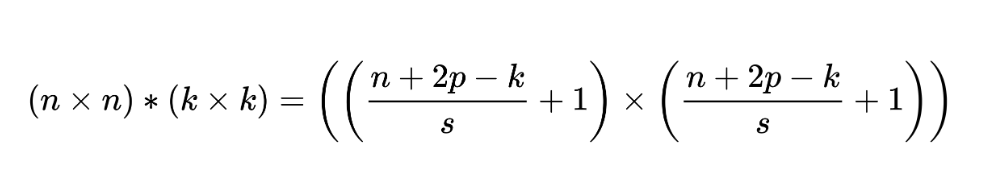

Size after pooling

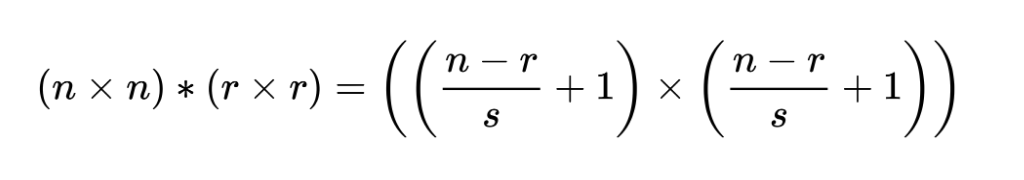

#Size of the Flatened Vector

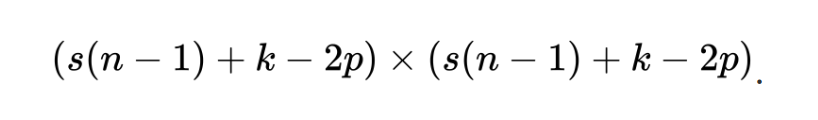

In [13]:
#We define the neural network model as we normally do

model=Sequential([
#1. This is the First Convulition layer 32 filter matrixes, each of them with 3x3 matrixes + input shape of the image.
#2. This gives us 32*(1*3*3 + 1)=320 parameters to estimate in this layer    
    Convolution2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(28,28,1)),
#4. THE OUTPUT HERE IS  (28X28)*(3X3)= IS A (26X26) CONVOLUTION    
#3. We pass the 32 Convolutions layers through an activation function it does not change the size just the values inside the matrixes    
    Activation('relu'),
#4. A second convolutional Layer. This time the input shape is going 3x3 matrixes. So Now I will have 32x32=1024 of (26x26) layer
#5. By aplying a second convolutions (26x26)*(3x3) =   (24x24) , 1024 matrixes in total, The number of parameters now jumps 9248 parameters for this second set of filter?
    Convolution2D(filters=32,
                 kernel_size=(3,3)),
#6. Another Activation Layer    
    Activation('relu'),
#10. With max pooling I reduce the dimensions to (12x12) and still with the 32 matrixes    
    MaxPooling2D(pool_size=(2,2)),
#7. Flatening the tensor makes it a tensor of inputs 
    Flatten(),
#8. Normal Neural Network    
    Dense(64),
    Activation('relu'),
#19.Out put layer  end in a probability  
    Dense(10),
    Activation('softmax')])
    

print(model.summary())    
    


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [15]:
#We define a loss metric
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')

In [18]:
#We train the Model
model.fit(X_train, Y_train, batch_size=100, epochs=10,validation_split=0.1, verbose=1)

Epoch 1/10
540/540 [==============================] - 30s 55ms/step - loss: 1.4996 - accuracy: 0.7549 - val_loss: 1.1574 - val_accuracy: 0.7947
Epoch 2/10
540/540 [==============================] - 30s 56ms/step - loss: 1.2915 - accuracy: 0.7806 - val_loss: 0.9958 - val_accuracy: 0.8182
Epoch 3/10
540/540 [==============================] - 30s 56ms/step - loss: 1.1432 - accuracy: 0.8001 - val_loss: 0.8823 - val_accuracy: 0.8353
Epoch 4/10
540/540 [==============================] - 31s 57ms/step - loss: 1.0299 - accuracy: 0.8160 - val_loss: 0.7964 - val_accuracy: 0.8482
Epoch 5/10
540/540 [==============================] - 31s 58ms/step - loss: 0.9407 - accuracy: 0.8282 - val_loss: 0.7320 - val_accuracy: 0.8583
Epoch 6/10
540/540 [==============================] - 30s 55ms/step - loss: 0.8679 - accuracy: 0.8388 - val_loss: 0.6784 - val_accuracy: 0.8695
Epoch 7/10
540/540 [==============================] - 31s 58ms/step - loss: 0.8078 - accuracy: 0.8468 - val_loss: 0.6335 - val_accuracy:

In [19]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.6279 - accuracy: 0.8771
Test accuracy: 0.8770999908447266
